---
---

### Part 1
#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
### Part 2
#### 3. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement XGBoost Classifier



# Part 2
## 3. Prediction (Multi-class Classification)

### Import Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.tree import plot_tree
from yellowbrick.classifier import ClassPredictionError, ROCAUC

### Data Preprocessing

In [17]:
data=pd.read_csv("pendigits_txt.csv")
data_cleaned=pd.read_csv("handdigit_EDA.csv")

In [18]:
X=data.drop("class", axis=1)
y= data["class"]

In [19]:
X_train, X_test, y_train, y_test= train_test_split (X,y,test_size=0.25, shuffle=False)

### Implement XGBoost Classifier

In [20]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [21]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [22]:
eval_metric(xgb_model,X_train, y_train, X_test, y_test)

Test_Set
[[265   0   0   0   0   0   0   0   7   0]
 [  0 282   7   0   0   1   0   2   0   0]
 [  0   2 291   0   0   0   0   1   0   0]
 [  0   0   0 278   0   0   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   2   0 259   1   1   0   4]
 [  0   0   1   0   0   2 261   0   0   0]
 [  0   4   2   1   4   0   1 254   0   3]
 [  2   0   0   0   0   0   0   0 254   0]
 [  0   0   0   6   0   0   0   1   1 258]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       272
           1       0.98      0.97      0.97       292
           2       0.97      0.99      0.98       294
           3       0.97      1.00      0.98       278
           4       0.99      1.00      0.99       290
           5       0.99      0.97      0.98       267
           6       0.99      0.99      0.99       264
           7       0.98      0.94      0.96       269
           8       0.97      0.99      0.98       256
           9       

In [23]:
scores=cross_validate(xgb_model, X_train, y_train, scoring=["f1_micro"],
                      cv=10, return_train_score=True, n_jobs=-1)
df_scores=pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_f1_micro     0.989931
train_f1_micro    1.000000
dtype: float64

## GridSearch

In [35]:
param_grid = {"n_estimators":[100, 200, 250],'max_depth':[4,5], "learning_rate": [0.2, 0.3],
             "subsample":[0.4, 0.5, 0.8], "colsample_bytree":[0.3, 0.5, 0.7]}

In [36]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1_micro", verbose=1, n_jobs = -1, 
                        return_train_score=True)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.4; total time=   2.2s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.4; total time=   2.2s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.4; total time=   2.2s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.4; total time=   2.2s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.4; total time=   2.2s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.5; total time=   2.3s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.5; total time=   2.4s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.5; total time=   2.3s
[CV] END colsampl

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.2, 0.3], 'max_depth': [4, 5],
                         'n_estimators': [100, 200, 250],
                         'subsample': [0.4, 0.5, 0.8]},
             return_train_score=True, scoring='f1_micro', verbose=2)

In [28]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.5}

In [29]:
xgb_grid.best_score_

0.9918717286734532

In [37]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 4,
 'n_estimators': 100,
 'subsample': 0.5}

In [38]:
xgb_grid.best_score_

0.9924783775986624

In [30]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[266   0   0   0   0   0   0   0   6   0]
 [  0 282   6   0   1   2   0   1   0   0]
 [  0   2 291   1   0   0   0   0   0   0]
 [  0   1   0 277   0   0   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   3   0 261   1   0   0   2]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   3   2   0   0   0   0 262   0   2]
 [  1   0   0   0   0   1   0   0 254   0]
 [  0   1   0   3   0   0   0   1   1 260]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       272
           1       0.98      0.97      0.97       292
           2       0.97      0.99      0.98       294
           3       0.98      1.00      0.99       278
           4       1.00      1.00      1.00       290
           5       0.99      0.98      0.98       267
           6       1.00      1.00      1.00       264
           7       0.99      0.97      0.98       269
           8       0.97      0.99      0.98       256
           9       

In [39]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[266   0   0   0   0   0   0   0   6   0]
 [  0 284   5   0   1   0   0   1   0   1]
 [  0   1 292   1   0   0   0   0   0   0]
 [  0   0   0 277   0   1   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   3   0 262   0   0   0   2]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   2   4   0   0   0   0 262   0   1]
 [  1   0   0   0   0   1   0   0 254   0]
 [  0   0   0   4   0   0   0   2   1 259]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       272
           1       0.99      0.97      0.98       292
           2       0.97      0.99      0.98       294
           3       0.97      1.00      0.98       278
           4       1.00      1.00      1.00       290
           5       0.99      0.98      0.99       267
           6       1.00      1.00      1.00       264
           7       0.99      0.97      0.98       269
           8       0.97      0.99      0.98       256
           9       

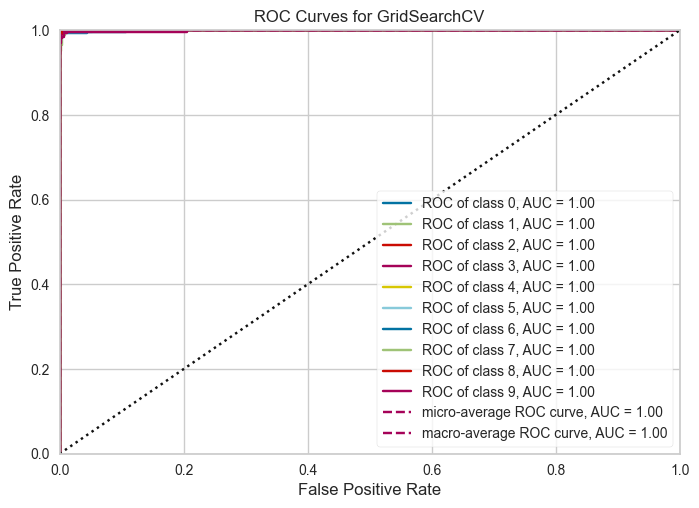

In [31]:
visualizer = ROCAUC(xgb_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();

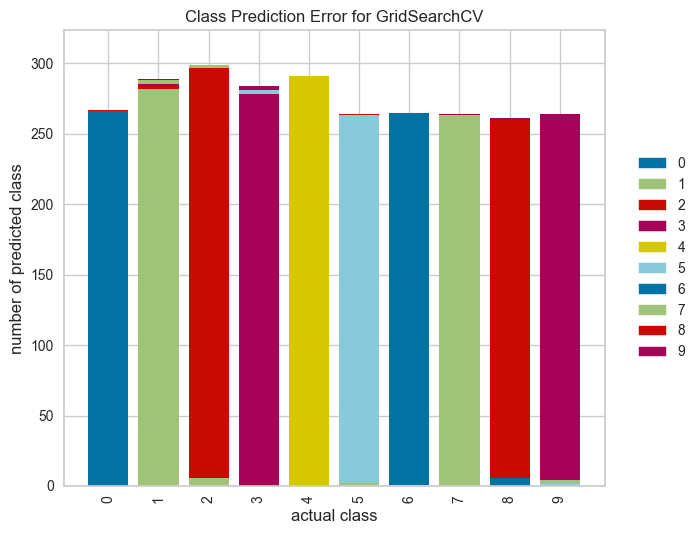

In [33]:
visualizer = ClassPredictionError(xgb_grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show();

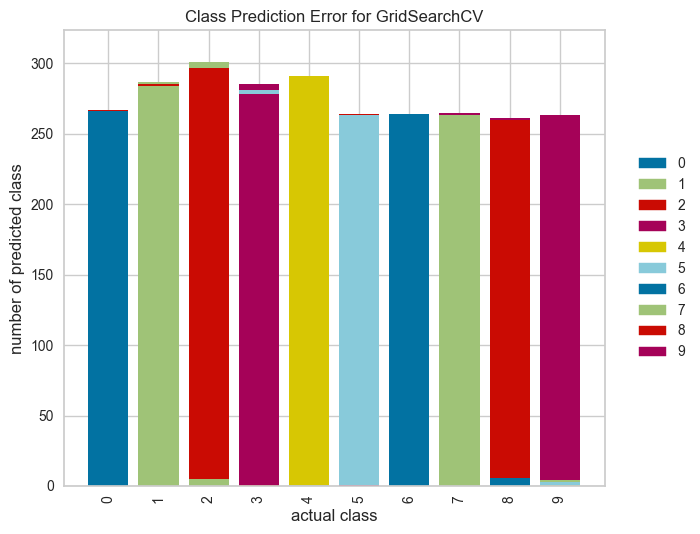

In [41]:
visualizer = ClassPredictionError(xgb_grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show();